In [1]:
import pandas as pd
import numpy as np
import json
import requests
import time
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("clean_fire.csv")
df.head()

,LONGITUDE,LATITUDE,GLOBALID,FIRENAME,FIREYEAR,SECURITYID,DISCOVERYDATETIME,SIZECLASS,TOTALACRES,STATCAUSE,DATASOURCE,FIREOUTDATETIME,OWNERAGENCY,UNITIDOWNER,PROTECTIONAGENCY,POINTTYPE,PERIMEXISTS,FIRERPTQC,ACCURACY,SHAPE
0,-107.616389,40.133056,{F905659B-32E6-4571-9E67-E59E355602F5},Milk Creek,2013,0215,2013/07/04 00:00:01+00,D,112.0,Lightning,24,2013/09/04 13:00:01+00,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN
1,-107.562222,39.759722,{2A5831B5-A7EF-435D-A9D8-ECF4772B45F6},Meadow Creek,2010,0215,2010/06/28 00:00:01+00,F,1462.0,Lightning,24,2010/11/01 17:00:01+00,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN
2,-106.221111,39.811111,{0B8060F0-22F6-4A41-88E5-C1E7E9D23AE3},Brush Creek,2015,0215,2015/10/02 00:00:01+00,D,234.0,Lightning,24,2015/11/17 09:00:01+00,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN
3,-107.118333,39.950000,{041F5782-6839-4EFE-8824-79B883394529},Middle Derby,1999,0215,1999/11/15 00:00:01+00,D,265.0,Undetermined,24,1999/12/07 10:00:01+00,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN
4,-106.533056,38.138889,{28674346-7F82-447D-93E0-302D6AD99C52},BENNY'S CREEK WFU,2005,0209,2005/07/18 00:00:00+00,D,135.0,Lightning,46,2005/11/28 00:00:00+00,USFS,CORGF,USFS,General,Y,NaN,NaN,NaN


In [3]:
fire_df = df.copy()
fire_df.head()

,LONGITUDE,LATITUDE,GLOBALID,FIRENAME,FIREYEAR,SECURITYID,DISCOVERYDATETIME,SIZECLASS,TOTALACRES,STATCAUSE,DATASOURCE,FIREOUTDATETIME,OWNERAGENCY,UNITIDOWNER,PROTECTIONAGENCY,POINTTYPE,PERIMEXISTS,FIRERPTQC,ACCURACY,SHAPE
0,-107.616389,40.133056,{F905659B-32E6-4571-9E67-E59E355602F5},Milk Creek,2013,0215,2013/07/04 00:00:01+00,D,112.0,Lightning,24,2013/09/04 13:00:01+00,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN
1,-107.562222,39.759722,{2A5831B5-A7EF-435D-A9D8-ECF4772B45F6},Meadow Creek,2010,0215,2010/06/28 00:00:01+00,F,1462.0,Lightning,24,2010/11/01 17:00:01+00,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN
2,-106.221111,39.811111,{0B8060F0-22F6-4A41-88E5-C1E7E9D23AE3},Brush Creek,2015,0215,2015/10/02 00:00:01+00,D,234.0,Lightning,24,2015/11/17 09:00:01+00,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN
3,-107.118333,39.950000,{041F5782-6839-4EFE-8824-79B883394529},Middle Derby,1999,0215,1999/11/15 00:00:01+00,D,265.0,Undetermined,24,1999/12/07 10:00:01+00,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN
4,-106.533056,38.138889,{28674346-7F82-447D-93E0-302D6AD99C52},BENNY'S CREEK WFU,2005,0209,2005/07/18 00:00:00+00,D,135.0,Lightning,46,2005/11/28 00:00:00+00,USFS,CORGF,USFS,General,Y,NaN,NaN,NaN


In [4]:
# Define the bins
bins = [0, 0.25, 9.99, 99.99, 299.99, 999.99, 4999.99, 9999.99, 49999.99, 99999.99, 499999.99, 999000, 10000000000]
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

fire_df["SIZECLASS_2"] = pd.cut(fire_df["TOTALACRES"], bins=bins, labels=labels, right=True)

In [5]:
# Show the fire_df data types
fire_df.dtypes

LONGITUDE             float64
LATITUDE              float64
GLOBALID               object
FIRENAME               object
FIREYEAR                int64
SECURITYID             object
DISCOVERYDATETIME      object
SIZECLASS              object
TOTALACRES            float64
STATCAUSE              object
DATASOURCE             object
FIREOUTDATETIME        object
OWNERAGENCY            object
UNITIDOWNER            object
PROTECTIONAGENCY       object
POINTTYPE              object
PERIMEXISTS            object
FIRERPTQC              object
ACCURACY              float64
SHAPE                 float64
SIZECLASS_2          category
dtype: object

In [6]:
#change the data type of SIZECLASS_2 from category to object
fire_df["SIZECLASS_2"] = fire_df["SIZECLASS_2"].astype('object')
fire_df.dtypes

LONGITUDE            float64
LATITUDE             float64
GLOBALID              object
FIRENAME              object
FIREYEAR               int64
SECURITYID            object
DISCOVERYDATETIME     object
SIZECLASS             object
TOTALACRES           float64
STATCAUSE             object
DATASOURCE            object
FIREOUTDATETIME       object
OWNERAGENCY           object
UNITIDOWNER           object
PROTECTIONAGENCY      object
POINTTYPE             object
PERIMEXISTS           object
FIRERPTQC             object
ACCURACY             float64
SHAPE                float64
SIZECLASS_2           object
dtype: object

In [7]:
fire_df.head()

,LONGITUDE,LATITUDE,GLOBALID,FIRENAME,FIREYEAR,SECURITYID,DISCOVERYDATETIME,SIZECLASS,TOTALACRES,STATCAUSE,...,FIREOUTDATETIME,OWNERAGENCY,UNITIDOWNER,PROTECTIONAGENCY,POINTTYPE,PERIMEXISTS,FIRERPTQC,ACCURACY,SHAPE,SIZECLASS_2
0,-107.616389,40.133056,{F905659B-32E6-4571-9E67-E59E355602F5},Milk Creek,2013,0215,2013/07/04 00:00:01+00,D,112.0,Lightning,...,2013/09/04 13:00:01+00,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN,D
1,-107.562222,39.759722,{2A5831B5-A7EF-435D-A9D8-ECF4772B45F6},Meadow Creek,2010,0215,2010/06/28 00:00:01+00,F,1462.0,Lightning,...,2010/11/01 17:00:01+00,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN,F
2,-106.221111,39.811111,{0B8060F0-22F6-4A41-88E5-C1E7E9D23AE3},Brush Creek,2015,0215,2015/10/02 00:00:01+00,D,234.0,Lightning,...,2015/11/17 09:00:01+00,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN,D
3,-107.118333,39.950000,{041F5782-6839-4EFE-8824-79B883394529},Middle Derby,1999,0215,1999/11/15 00:00:01+00,D,265.0,Undetermined,...,1999/12/07 10:00:01+00,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN,D
4,-106.533056,38.138889,{28674346-7F82-447D-93E0-302D6AD99C52},BENNY'S CREEK WFU,2005,0209,2005/07/18 00:00:00+00,D,135.0,Lightning,...,2005/11/28 00:00:00+00,USFS,CORGF,USFS,General,Y,NaN,NaN,NaN,D


In [8]:
# Drop "DISCOVERYDATETIME" and "FIREOUTDATETIME"
fire_df = fire_df.drop(columns=["DISCOVERYDATETIME", "FIREOUTDATETIME"])
fire_df.head()

,LONGITUDE,LATITUDE,GLOBALID,FIRENAME,FIREYEAR,SECURITYID,SIZECLASS,TOTALACRES,STATCAUSE,DATASOURCE,OWNERAGENCY,UNITIDOWNER,PROTECTIONAGENCY,POINTTYPE,PERIMEXISTS,FIRERPTQC,ACCURACY,SHAPE,SIZECLASS_2
0,-107.616389,40.133056,{F905659B-32E6-4571-9E67-E59E355602F5},Milk Creek,2013,0215,D,112.0,Lightning,24,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN,D
1,-107.562222,39.759722,{2A5831B5-A7EF-435D-A9D8-ECF4772B45F6},Meadow Creek,2010,0215,F,1462.0,Lightning,24,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN,F
2,-106.221111,39.811111,{0B8060F0-22F6-4A41-88E5-C1E7E9D23AE3},Brush Creek,2015,0215,D,234.0,Lightning,24,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN,D
3,-107.118333,39.950000,{041F5782-6839-4EFE-8824-79B883394529},Middle Derby,1999,0215,D,265.0,Undetermined,24,USFS,COWRF,USFS,General,Y,Yes,24000.0,NaN,D
4,-106.533056,38.138889,{28674346-7F82-447D-93E0-302D6AD99C52},BENNY'S CREEK WFU,2005,0209,D,135.0,Lightning,46,USFS,CORGF,USFS,General,Y,NaN,NaN,NaN,D


In [9]:
# Display the number of rows in the DataFrame
number_of_rows = len(fire_df)
print("Number of rows:", number_of_rows)

Number of rows: 15322


In [10]:
# Ensure the 'FIREYEAR' column exists
if 'FIREYEAR' in fire_df.columns:
    # Find the oldest and most recent fire years
    oldest_fire_year = fire_df['FIREYEAR'].min()
    most_recent_fire_year = fire_df['FIREYEAR'].max()

    print(f"Oldest fire year: {oldest_fire_year}")
    print(f"Most recent fire year: {most_recent_fire_year}")
else:
    print("Column 'FIREYEAR' does not exist in the DataFrame.")

Oldest fire year: 1902
Most recent fire year: 2023


In [11]:
# Replace NaN and inf values due to error (IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer)
fire_df["FIREYEAR"] = fire_df["FIREYEAR"].fillna(-1)

# Convert "FIREYEAR" to an integer
fire_df["FIREYEAR"] = fire_df["FIREYEAR"].astype(int)

In [12]:
# Exclude placeholder values before calculating min and max
valid_years = fire_df["FIREYEAR"][fire_df["FIREYEAR"] != -1]

# Find and display the oldest and most recent FIREYEAR
oldest_year = valid_years.min()
most_recent_year = valid_years.max()

print("Oldest FIRE YEAR:", oldest_year)
print("Most recent FIRE YEAR:", most_recent_year)

Oldest FIRE YEAR: 1902
Most recent FIRE YEAR: 2023


In [13]:
# Get unique values in the 'STATCAUSE' column
statcause_values = fire_df['STATCAUSE'].unique()

print(f"Possible outcomes for STATCAUSE: {statcause_values}")

Possible outcomes for STATCAUSE: ['Lightning' 'Undetermined' 'Debris Burning' 'Camping' nan 'Smoking'
 'Equipment' 'Other Human Causes' 'Railroad' 'Miscellaneous'
 'Other Natural Causes' 'Firearms' 'Incendiary' 'Arson' 'Utilities']


In [14]:
#How many fires per year dataframe
grouped_fireyear_df = fire_df.groupby(['FIREYEAR'])

fireyear_counts = grouped_fireyear_df['FIREYEAR'].count()

fire_counts_by_year_df = pd.DataFrame(
    fireyear_counts)

fire_counts_by_year_df = fire_counts_by_year_df.rename(columns={"FIREYEAR": "Total # of Fires"})

fire_counts_by_year_df.head(10)

,Total # of Fires
FIREYEAR,
1902,1
1910,2
1914,3
1916,3
1919,9
1920,1
1921,1
1923,1
1925,1


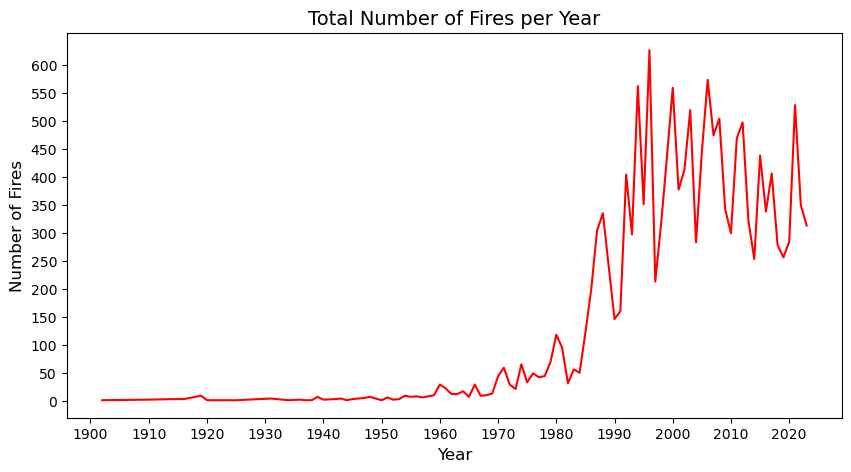

In [63]:
#Line chart showing how many total fires happened in each year over

plt.figure(figsize=(10,5))
plt.plot(fire_counts_by_year_df.index.values, fire_counts_by_year_df["Total # of Fires"], color='red')

plt.title("Total Number of Fires per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Fires", fontsize=12)
plt.xticks(np.arange(1900, 2023, 10))
plt.yticks(np.arange(0, 610, 50))

#save the graph
plt.savefig("../total_fires_per_year.png")

#display the graph
plt.show()

In [16]:
#How many fires per size class dataframe

grouped_sizeclass_df = fire_df.groupby(['SIZECLASS_2'])

fireyear_counts = grouped_sizeclass_df['FIREYEAR'].count()

fire_counts_by_year_and_sizelcass_df = pd.DataFrame(
    fireyear_counts)

fire_counts_by_year_and_sizelcass_df = fire_counts_by_year_and_sizelcass_df.rename(columns={"FIREYEAR": "Total # of Fires"})

fire_counts_by_year_and_sizelcass_df.head(10)

,Total # of Fires
SIZECLASS_2,
D,6156
E,4182
F,3023
G,800
H,901
I,157
J,101
K,2


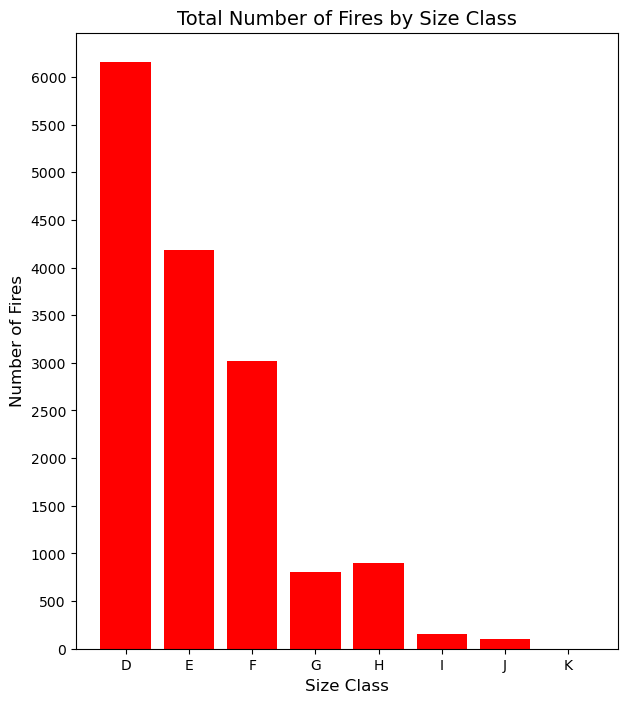

In [60]:
#Bar chart showing how many total fires of each size class

plt.figure(figsize=(7,8))

plt.bar(fire_counts_by_year_and_sizelcass_df.index.values, fire_counts_by_year_and_sizelcass_df["Total # of Fires"], color='red')

plt.title("Total Number of Fires by Size Class", fontsize=14)
plt.xlabel("Size Class", fontsize=12)
plt.ylabel("Number of Fires", fontsize=12)
plt.yticks(np.arange(0, 6500, 500))

#save the graph
plt.savefig("../total_fires_by_sizeclass.png")

#display the graph
plt.show()

In [18]:
#dataframe of fires of sizeclass D by year

fire_df_D = fire_df.loc[fire_df['SIZECLASS_2'] == 'D']

fire_df_D_by_year = fire_df_D.groupby(['FIREYEAR']).count()

fire_df_D_by_year = fire_df_D_by_year[["TOTALACRES"]]

fire_df_D_by_year.tail(10)

,TOTALACRES
FIREYEAR,
2014,91
2015,147
2016,112
2017,112
2018,86
2019,96
2020,76
2021,182
2022,124


In [19]:
#dataframe of fires of sizeclass E by year

fire_df_E = fire_df.loc[fire_df['SIZECLASS_2'] == 'E']

fire_df_E_by_year = fire_df_E.groupby(['FIREYEAR']).count()

fire_df_E_by_year = fire_df_E_by_year[["TOTALACRES"]]

fire_df_E_by_year.tail(10)

,TOTALACRES
FIREYEAR,
2014,72
2015,115
2016,94
2017,103
2018,71
2019,69
2020,69
2021,144
2022,101


In [20]:
#dataframe of fires of sizeclass F by year

fire_df_F = fire_df.loc[fire_df['SIZECLASS_2'] == 'F']

fire_df_F_by_year = fire_df_F.groupby(['FIREYEAR']).count()

fire_df_F_by_year = fire_df_F_by_year[["TOTALACRES"]]

fire_df_F_by_year.tail(10)

,TOTALACRES
FIREYEAR,
2014,49
2015,92
2016,86
2017,104
2018,57
2019,64
2020,58
2021,102
2022,75


In [21]:
#dataframe of fires of sizeclass G by year

fire_df_G = fire_df.loc[fire_df['SIZECLASS_2'] == 'G']

fire_df_G_by_year = fire_df_G.groupby(['FIREYEAR']).count()

fire_df_G_by_year = fire_df_G_by_year[["TOTALACRES"]]

fire_df_G_by_year.tail(10)

,TOTALACRES
FIREYEAR,
2014,18
2015,38
2016,21
2017,23
2018,25
2019,15
2020,17
2021,30
2022,24


In [22]:
#dataframe of fires of sizeclass H by year

fire_df_H = fire_df.loc[fire_df['SIZECLASS_2'] == 'H']

fire_df_H_by_year = fire_df_H.groupby(['FIREYEAR']).count()

fire_df_H_by_year = fire_df_H_by_year[["TOTALACRES"]]

fire_df_H_by_year.tail(10)

,TOTALACRES
FIREYEAR,
2014,20
2015,29
2016,23
2017,53
2018,26
2019,9
2020,38
2021,47
2022,18


In [23]:
#dataframe of fires of sizeclass I by year

fire_df_I = fire_df.loc[fire_df['SIZECLASS_2'] == 'I']

fire_df_I_by_year = fire_df_I.groupby(['FIREYEAR']).count()

fire_df_I_by_year = fire_df_I_by_year[["TOTALACRES"]]

fire_df_I_by_year.tail(10)

,TOTALACRES
FIREYEAR,
2013,2
2014,2
2015,13
2017,7
2018,8
2019,1
2020,10
2021,12
2022,2


In [24]:
#dataframe of fires of sizeclass J by year

fire_df_J = fire_df.loc[fire_df['SIZECLASS_2'] == 'J']

fire_df_J_by_year = fire_df_J.groupby(['FIREYEAR']).count()

fire_df_J_by_year = fire_df_J_by_year[["TOTALACRES"]]

fire_df_J_by_year.tail(10)

,TOTALACRES
FIREYEAR,
2013,3
2014,1
2015,4
2016,2
2017,4
2018,5
2019,2
2020,16
2021,10


In [25]:
#dataframe of fires of sizeclass K by year

fire_df_K = fire_df.loc[fire_df['SIZECLASS_2'] == 'K']

fire_df_K_by_year = fire_df_K.groupby(['FIREYEAR']).count()

fire_df_K_by_year = fire_df_K_by_year[["TOTALACRES"]]

fire_df_K_by_year.tail(10)

,TOTALACRES
FIREYEAR,
2011,1
2021,1


In [26]:
#How many fires per size class in each year dataframe

grouped_sizeclass_df = fire_df.groupby(['FIREYEAR','SIZECLASS_2']).count()

grouped_by_both_df = grouped_sizeclass_df[["TOTALACRES"]]

grouped_by_both_df.tail(30)

TOTALACRES
FIREYEAR SIZECLASS_2            
2019     I                     1
         J                     2
2020     D                    76
         E                    69
         F                    58
         G                    17
         H                    38
         I                    10
         J                    16
2021     D                   182
         E                   144
         F                   102
         G                    30
         H                    47
         I                    12
         J                    10
         K                     1
2022     D                   124
         E                   101
         F                    75
         G                    24
         H                    18
         I                     2
         J                     5
2023     D                   106
         E                    86
         F                    83
         G                    17
         H                    19
         I                     2

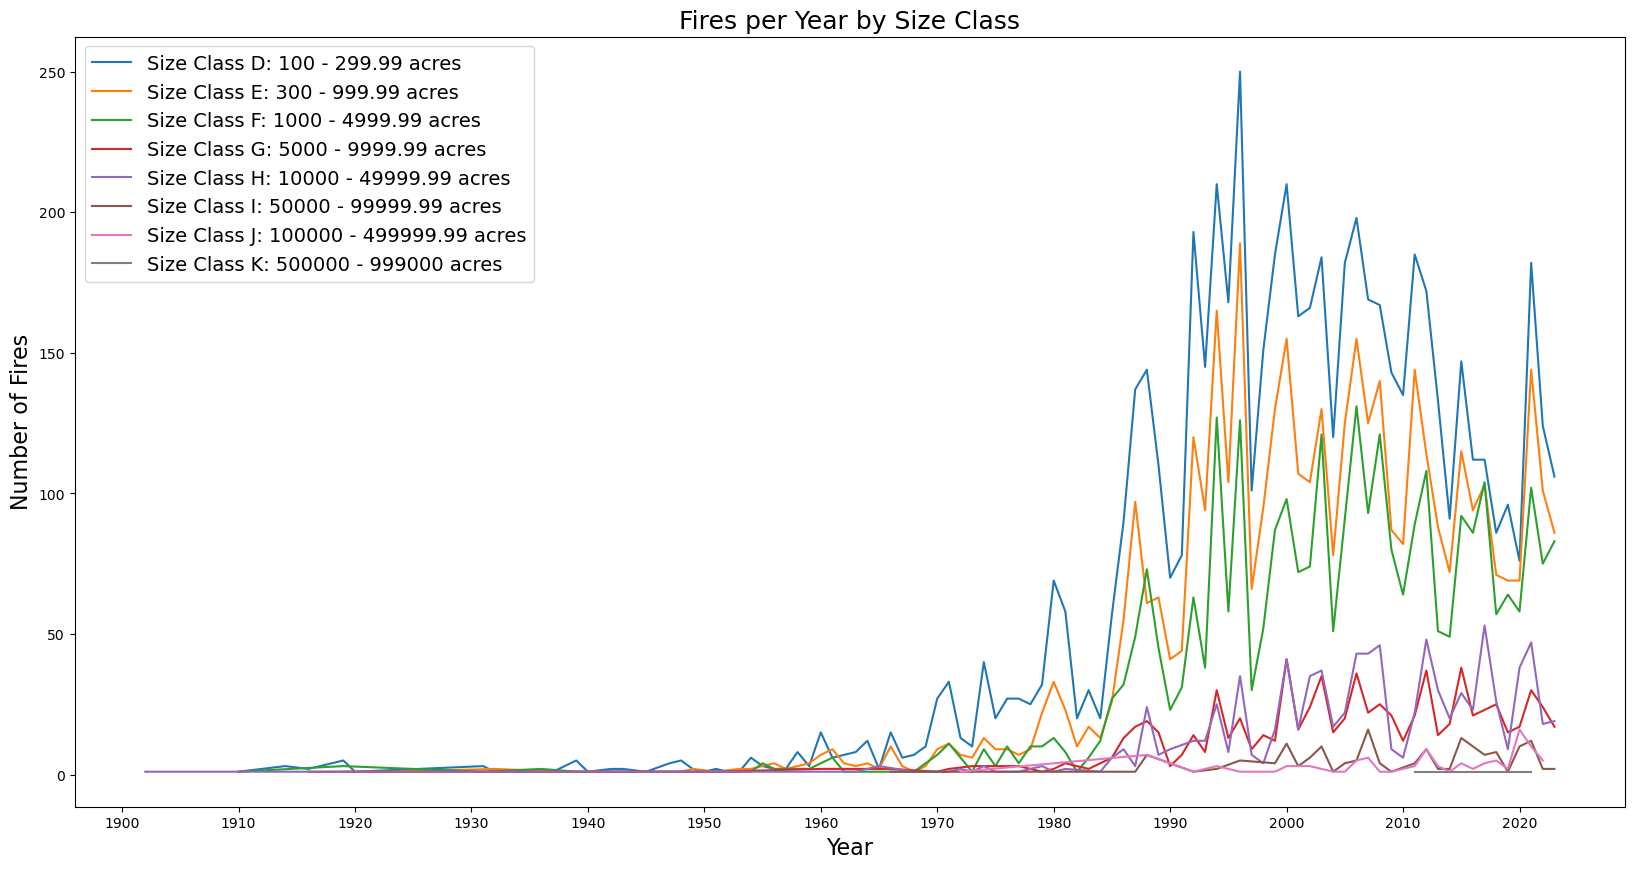

In [51]:
#Line chart showing how many total fires happened in each year over by sizeclass

plt.figure(figsize=(20,10))
plt.plot(fire_df_D_by_year.index.values, fire_df_D_by_year["TOTALACRES"], label= "Size Class D: 100 - 299.99 acres")
plt.plot(fire_df_E_by_year.index.values, fire_df_E_by_year["TOTALACRES"], label= "Size Class E: 300 - 999.99 acres")
plt.plot(fire_df_F_by_year.index.values, fire_df_F_by_year["TOTALACRES"], label= "Size Class F: 1000 - 4999.99 acres")
plt.plot(fire_df_G_by_year.index.values, fire_df_G_by_year["TOTALACRES"], label= "Size Class G: 5000 - 9999.99 acres")
plt.plot(fire_df_H_by_year.index.values, fire_df_H_by_year["TOTALACRES"], label= "Size Class H: 10000 - 49999.99 acres")
plt.plot(fire_df_I_by_year.index.values, fire_df_I_by_year["TOTALACRES"], label= "Size Class I: 50000 - 99999.99 acres")
plt.plot(fire_df_J_by_year.index.values, fire_df_J_by_year["TOTALACRES"], label= "Size Class J: 100000 - 499999.99 acres")
plt.plot(fire_df_K_by_year.index.values, fire_df_K_by_year["TOTALACRES"], label= "Size Class K: 500000 - 999000 acres")

plt.title("Fires per Year by Size Class", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Fires", fontsize=16)
plt.legend(loc='upper left', prop={'size': 14})
plt.xticks(np.arange(1900, 2024, 10))

#save the graph
plt.savefig("../fires_per_year_by_sizeclass.png")

#display the graph
plt.show()